In [251]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [252]:
# Import Warnings

import warnings
warnings.filterwarnings("ignore")

In [253]:
# Loading the dataset

df = pd.read_csv('/content/laptop.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


**DATA UNDERSTANDING**

In [254]:
# Shape

df.shape

(1303, 13)

In [255]:
# Columns

df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [256]:
# Checking duplicate rows

df.duplicated().sum()

0

In [257]:
# Checking null values

df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [258]:
# Column Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


**DATA PREPROCESSING & EXPLORATION**

In [259]:
# Dropping the null values(Drop the rows where all elements are missing)

df.dropna(inplace=True)


In [260]:
# Shape

df.shape

(1273, 13)

In [261]:
# Removing unimportant column

df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [262]:
# In 'weight' column there is unwanted value

df[df['Weight'] == '?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72


In [263]:
# Finding mode of 'weight' column

df['Weight'].mode()[0]

'2.2kg'

In [264]:
# Replacing unwanted value with mode value in 'weight' column

df['Weight'] = df['Weight'].str.replace('?',df['Weight'].mode()[0])

In [265]:
# Changing 'Ram' and 'Weight' column into int datatype

df['Ram'] = df['Ram'].str.replace('GB','')
df['Ram'] = df['Ram'].str.strip()
df['Ram'] = df['Ram'].astype('int')
df['Weight'] = df['Weight'].str.replace('kg','')
df['Weight'] = df['Weight'].str.strip()
df['Weight'] = df['Weight'].astype('float')

In [266]:
# Checking column information

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 119.3+ KB


<Axes: ylabel='Density'>

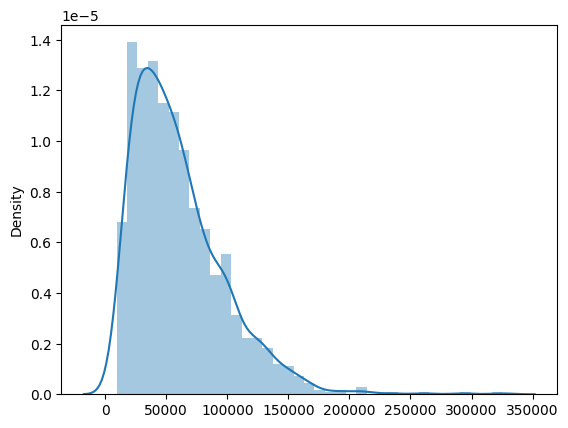

In [267]:
# Checking the distribution of 'price' column

sns.distplot(x=df['Price'])

<Axes: xlabel='Company'>

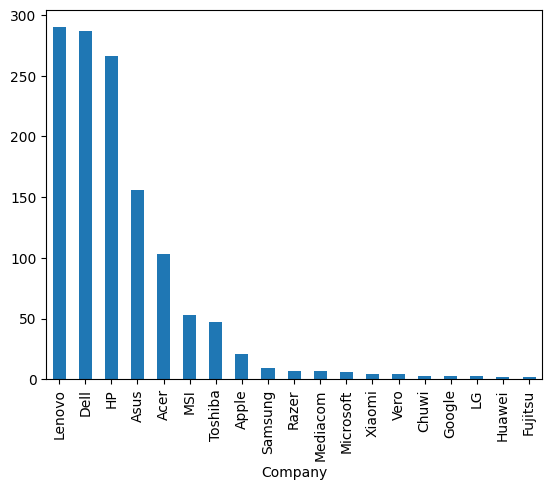

In [268]:
# Checking value_count for 'company' and plotting bar graph

df['Company'].value_counts().plot(kind='bar')

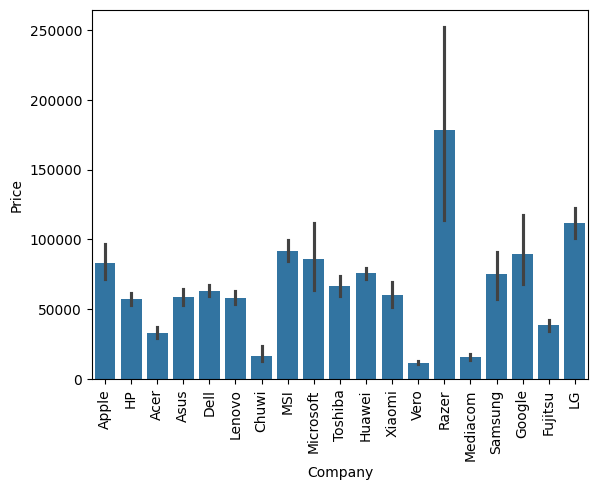

In [269]:
# Finding the relationship between 'company' and 'price' column

sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

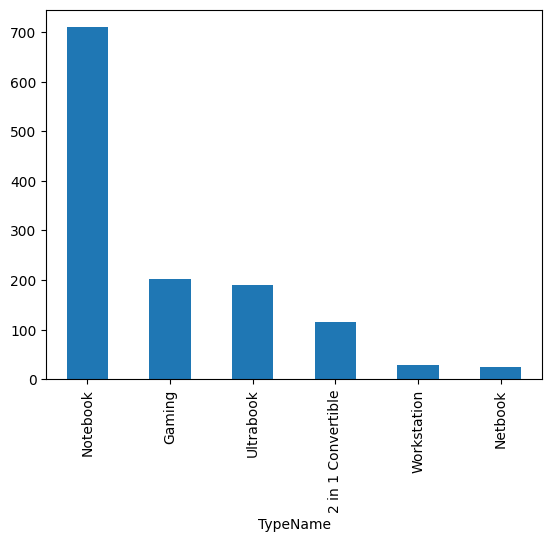

In [270]:
# Checking value_count for 'Typename' and plotting bar graph

df['TypeName'].value_counts().plot(kind='bar')

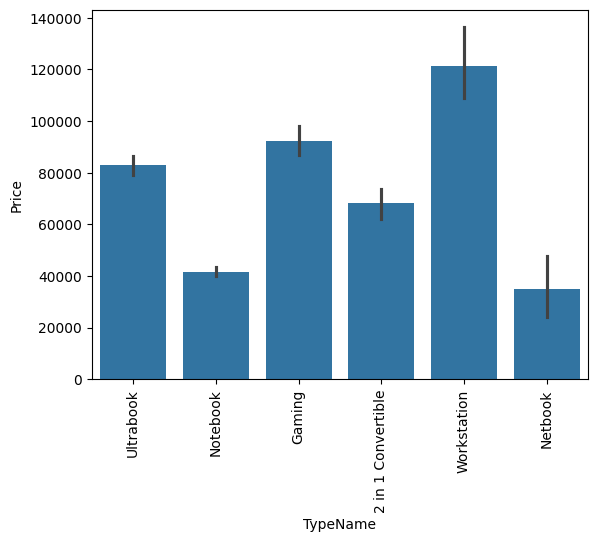

In [271]:
# Finding the relationship between 'Typename' and 'price' column

sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [272]:
# Checking value_count for 'screenresolution'

df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [273]:
# Extracting new feature 'Touchscreen' from 'screenresolution' column

df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [274]:
# Extracting new feature 'Ips' from 'screenresolution' column

df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [275]:
# Extracting new feature 'X_res' and 'Y_res' from 'screenresolution' column

new_df = df['ScreenResolution'].str.split('x',expand=True)

df['X_res'] = new_df[0]
df['Y_res'] = new_df[1]

In [276]:
# Extracting only the numeric part of 'X_res' column

df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [277]:
# Checking column information

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  Ips               1273 non-null   int64  
 13  X_res             1273 non-null   int64  
 14  Y_res             1273 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 159.1+ KB


In [278]:
# Finding correlation for numeric columns

numeric_df = df.select_dtypes(include=['int','float'])
numeric_df.corr().loc[:,'Price']

Ram            0.685648
Weight         0.175966
Price          1.000000
Touchscreen    0.188994
Ips            0.254851
X_res          0.557556
Y_res          0.554069
Name: Price, dtype: float64

In [279]:
# Investigation 'Inches' column and finding value_counts

df['Inches'].value_counts()

Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64

In [280]:
# Finding unwanted values in 'Inches' column

df[df['Inches'] == '?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
476,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,128298.24,0,0,1920,1080


In [281]:
# Finding mode of 'Inches' column

df['Inches'].mode()[0]

'15.6'

In [282]:
# Replacing unwanted values in 'Inches' column with mode value

df['Inches'] = df['Inches'].str.replace('?',df['Inches'].mode()[0]).astype('float')

In [283]:
# Creating new feature 'ppi'(Pixel Per Inches)

df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940


In [284]:
# Finding correlation for numeric columns

numeric_df = df.select_dtypes(include=['int','float'])
numeric_df.corr().loc[:,'Price']

Inches         0.044966
Ram            0.685648
Weight         0.175966
Price          1.000000
Touchscreen    0.188994
Ips            0.254851
X_res          0.557556
Y_res          0.554069
ppi            0.468636
Name: Price, dtype: float64

In [285]:
# Dropping 'ScreenResolution','Inches','X_res','Y_res'

df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [286]:
# Checking the Dataframe

df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


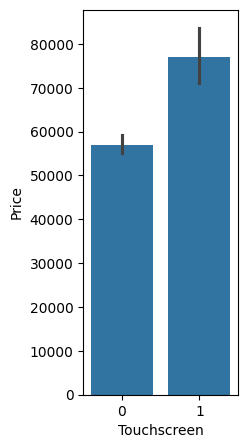

In [287]:
# Finding the relationship between 'Touchscreen' and 'price' column

plt.figure(figsize=(2,5))
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.show()

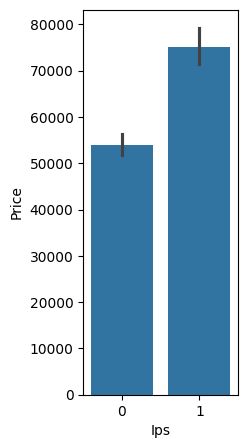

In [288]:
# Finding the relationship between 'Ips' and 'price' column

plt.figure(figsize=(2,5))
sns.barplot(x=df['Ips'],y=df['Price'])
plt.show()

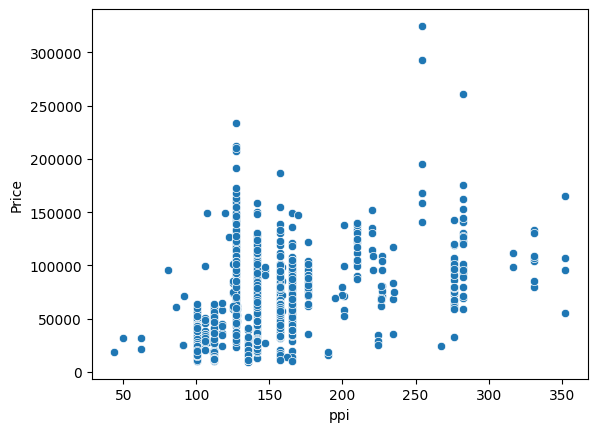

In [289]:
# Finding the relationship between 'ppi' and 'price' column

sns.scatterplot(x=df['ppi'],y=df['Price'])
plt.show()

In [290]:
# Checking value_count for 'Cpu'

df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [291]:
# Creating new feature 'Cpu_Name'

df['Cpu_Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [292]:
#  Checking sample of a dataframe

df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Name
312,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.8,111834.7200,0,1,141.211998,Intel Core i7
899,Dell,Notebook,Intel Core i5 7300U 2.6GHz,8,500GB HDD,Intel HD Graphics 620,Windows 10,1.9,49816.8000,0,0,141.211998,Intel Core i5
524,Dell,Notebook,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.8,47365.9200,0,1,127.335675,Intel Core i5
1074,Lenovo,Ultrabook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.3,91294.7472,1,1,176.232574,Intel Core i7
222,Toshiba,Ultrabook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.2,72620.6400,0,0,165.632118,Intel Core i7


In [293]:
def fetch_processor(txt):
  if txt == 'Intel Core i5' or txt == 'Intel Core i7' or txt == 'Intel Core i3':
      return txt
  elif txt.split()[0] == 'Intel':
      return 'Other Intel Processor'
  else:
      return 'AMD Processor'

In [294]:
# Creating 'Cpu_brand' using fetch_processor function

df['Cpu_brand'] = df['Cpu_Name'].apply(fetch_processor)

In [295]:
#  Checking sample of a dataframe

df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Name,Cpu_brand
611,Dell,Gaming,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,46833.6528,0,0,141.211998,Intel Core i7,Intel Core i7
60,Dell,Notebook,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.80,69210.7200,0,0,127.335675,Intel Core i7,Intel Core i7
11,HP,Notebook,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,1.86,18381.0672,0,0,141.211998,Intel Core i3,Intel Core i3
857,HP,2 in 1 Convertible,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,136343.5200,1,0,165.632118,Intel Core i7,Intel Core i7
763,Asus,Ultrabook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.20,60153.1200,0,1,276.053530,Intel Core i5,Intel Core i5


In [296]:
# Dropping 'Cpu' and 'Cpu_Name'

df.drop(columns=['Cpu','Cpu_Name'],inplace=True)

<Axes: xlabel='Cpu_brand'>

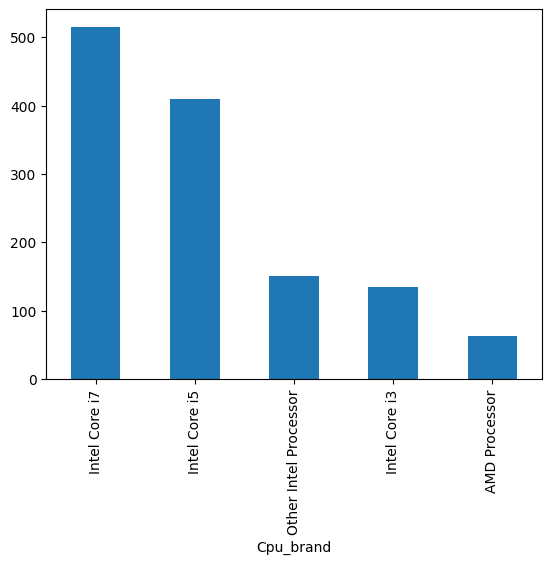

In [297]:
# Checking value_count for 'Cpu_brand' and plotting bar graph

df['Cpu_brand'].value_counts().plot(kind='bar')

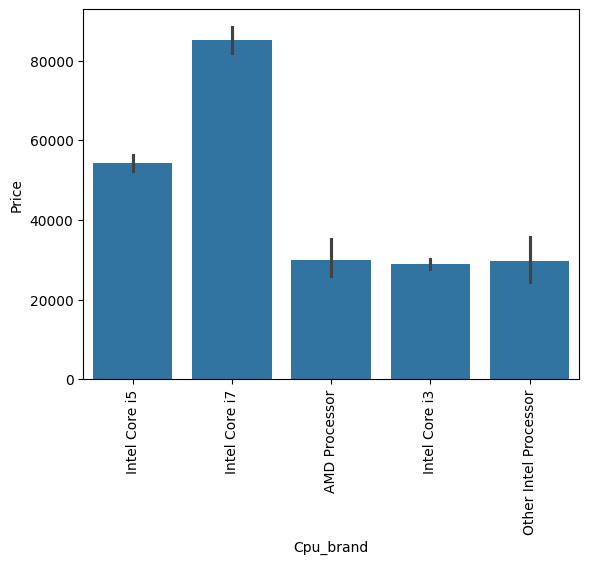

In [298]:
# Finding the relationship between 'Cpu_brand' and 'price' column

sns.barplot(x=df['Cpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Ram'>

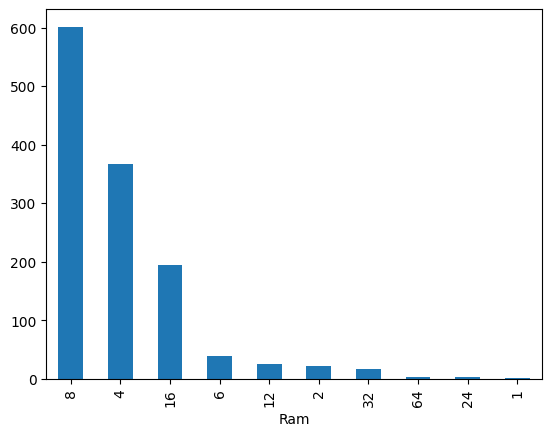

In [299]:
# Checking value_count for 'Ram' and plotting bar graph

df['Ram'].value_counts().plot(kind='bar')

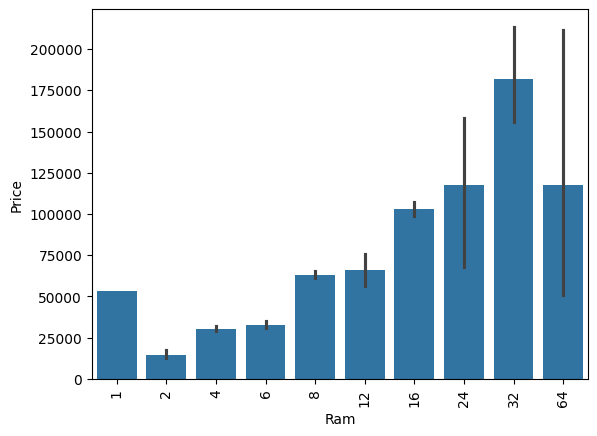

In [300]:
# Finding the relationship between 'Ram' and 'price' column

sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [301]:
# Checking 'Memory' value_counts

df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [302]:
def convert_to_gb(storage):
    storage = storage.strip().upper()
    if 'TB' in storage:
        return float(storage.replace('TB', '').strip()) * 1000
    elif 'GB' in storage:
        return float(storage.replace('GB', '').strip())
    return 0 # default if no match

def extract_memory(memory):
    # Initialize a dictionary to store different storage types
    storage_types = {'HDD': 0, 'SSD': 0, 'Hybrid': 0, 'Flash_Storage': 0}

    if pd.isna(memory):
        return pd.Series(storage_types)

    # Split the memory string by ' + ' to handle multiple storages
    parts = memory.split(' + ')

    for part in parts:
        if 'HDD' in part:
            storage_types['HDD'] += convert_to_gb(part.split()[0])
        elif 'SSD' in part:
            storage_types['SSD'] += convert_to_gb(part.split()[0])
        elif 'Hybrid' in part:
            storage_types['Hybrid'] += convert_to_gb(part.split()[0])
        elif 'Flash' in part:
            storage_types['Flash_Storage'] += convert_to_gb(part.split()[0])

    return pd.Series(storage_types)

# Apply the function to extract storage types into separate columns
df[['HDD', 'SSD', 'Hybrid', 'Flash_Storage']] = df['Memory'].apply(lambda x: extract_memory(x))

# Convert columns to integer type
df['HDD'] = df['HDD'].astype(int)
df['SSD'] = df['SSD'].astype(int)
df['Hybrid'] = df['Hybrid'].astype(int)
df['Flash_Storage'] = df['Flash_Storage'].astype(int)

In [303]:
#  Checking the dataframe

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [304]:
# Creating numeric column and assign it to new_df

new_df = df.select_dtypes(include=['int','float'])
new_df.sample(3)

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage
1122,8,1.43,80612.64,0,0,157.350512,0,256,0,0
893,8,1.32,95850.72,0,1,157.350512,0,256,0,0
905,16,1.08,111834.72,1,1,141.211998,0,512,0,0


In [305]:
#  Correlation between numeric column respective to 'price' column

new_df.corr()['Price']

Ram              0.685648
Weight           0.175966
Price            1.000000
Touchscreen      0.188994
Ips              0.254851
ppi              0.468636
HDD             -0.095394
SSD              0.668416
Hybrid           0.007843
Flash_Storage   -0.038332
Name: Price, dtype: float64

In [306]:
# Dropping 'Memory','Hybrid','Flash_Storage'

df.drop(columns=['Memory','Hybrid','Flash_Storage'],inplace=True)

In [307]:
#  Checking the Sample

df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD
14,Apple,Ultrabook,8,Intel HD Graphics 615,macOS,0.92,67260.6720,0,1,226.415547,Other Intel Processor,0,256
1002,Dell,Notebook,4,Intel HD Graphics 620,Windows 10,2.18,29144.1600,0,0,100.454670,Intel Core i3,0,128
1011,HP,Ultrabook,4,Intel HD Graphics 620,Windows 10,1.26,81997.9200,0,0,176.232574,Intel Core i5,500,0
1219,Acer,2 in 1 Convertible,8,Intel HD Graphics 615,Windows 10,1.20,61218.7200,1,1,157.350512,Intel Core i7,0,256
127,Asus,Notebook,4,AMD Radeon R2,Windows 10 S,1.65,14811.3072,0,0,111.935204,AMD Processor,0,64


<Axes: xlabel='HDD'>

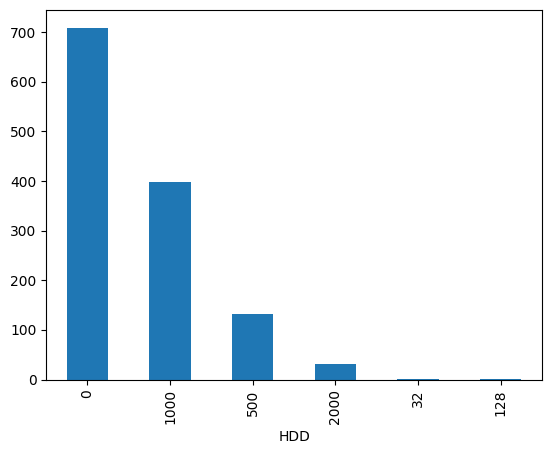

In [308]:
# Checking value_count for 'HDD' and plotting bar graph

df['HDD'].value_counts().plot(kind='bar')

<Axes: xlabel='SSD'>

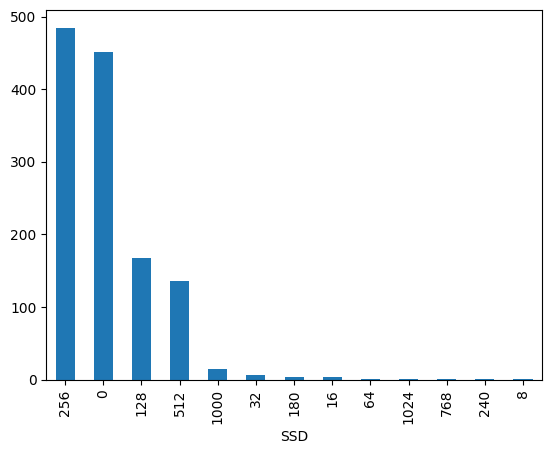

In [309]:
# Checking value_count for 'SSD' and plotting bar graph

df['SSD'].value_counts().plot(kind='bar')

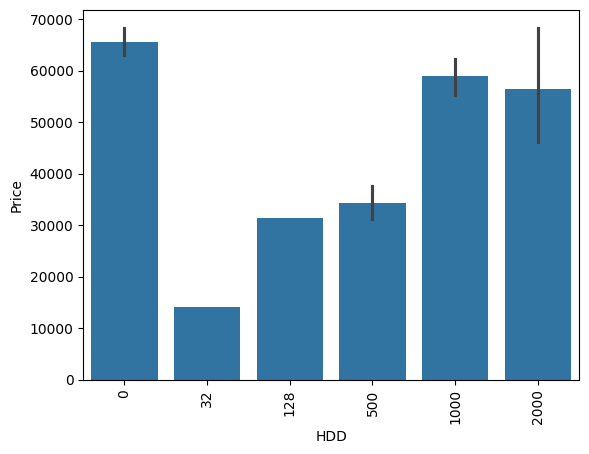

In [310]:
# Finding the relationship between 'HDD' and 'price' column

sns.barplot(x=df['HDD'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

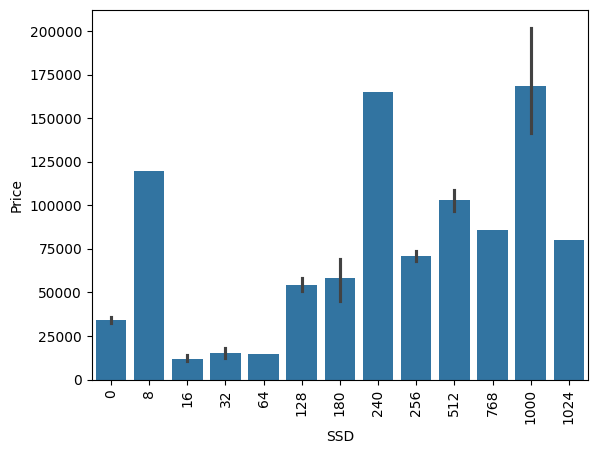

In [311]:
# Finding the relationship between 'SSD' and 'price' column

sns.barplot(x=df['SSD'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [312]:
# Checking 'Gpu' value_counts

df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [313]:
# Extracting new feature 'Gpu_brand'

df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [314]:
# Dropping 'Gpu'

df.drop(columns=['Gpu'],inplace=True)

<Axes: xlabel='Gpu_brand'>

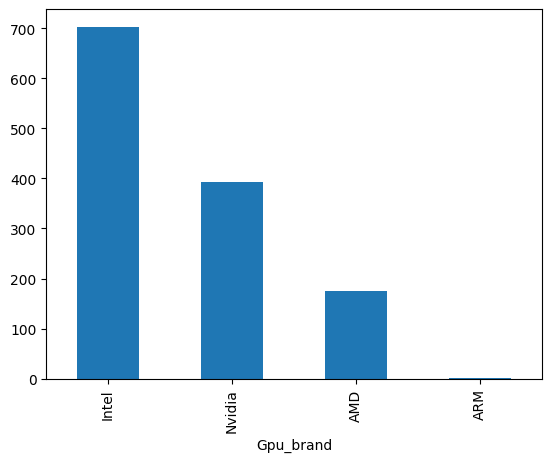

In [315]:
# Checking value_count for 'Gpu_brand' and plotting bar graph

df['Gpu_brand'].value_counts().plot(kind='bar')

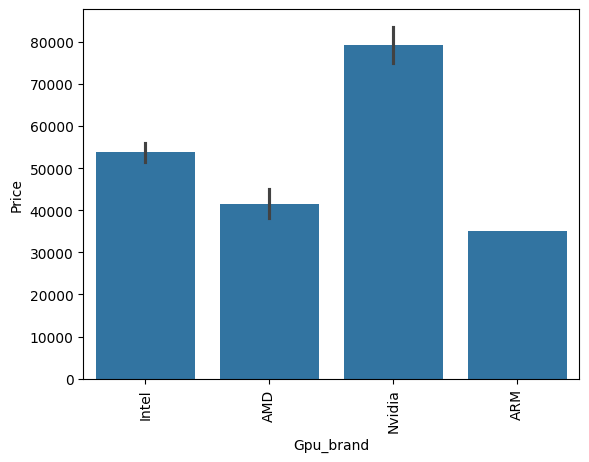

In [316]:
# Finding the relationship between 'Gpu_brand' and 'price' column

sns.barplot(x=df['Gpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [317]:
# # Checking value_count

df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [318]:
# Creating function to categorize OS

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [319]:
# Creating  new feature 'OS'

df['OS'] = df['OpSys'].apply(cat_os)

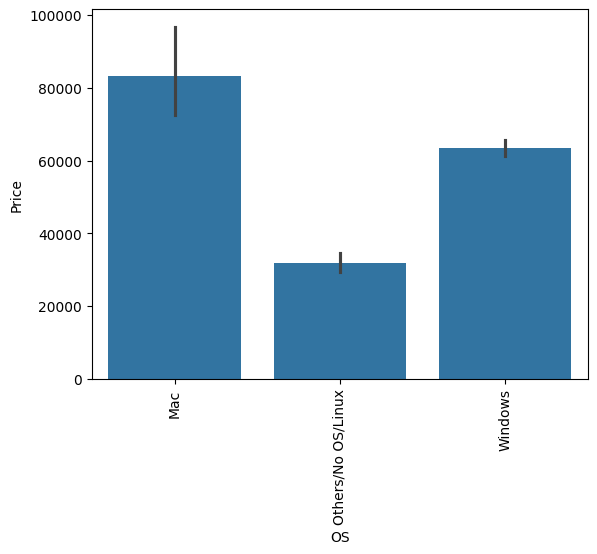

In [320]:
# Finding the relationship between 'OS' and 'price' column

sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [321]:
#  We got all the required  columns

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [322]:
#  Separating X(independent Variable) and y(Dependent Variable)

X = df.drop(columns='Price')
y = df['Price']

In [323]:
# X(independent features)

X.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,8,macOS,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [324]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   OpSys        1273 non-null   object 
 4   Weight       1273 non-null   float64
 5   Touchscreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  OS           1273 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 139.2+ KB


In [325]:
# y(Dependent features)

y.head()

0     71378.6832
1     47895.5232
2     30636.0000
3    135195.3360
4     96095.8080
Name: Price, dtype: float64

In [326]:
# Splitting the data for training and testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=0)

In [327]:
# Linear Regression, Random Forest, and Gradient Boosting to predict laptop prices.

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor


**LINEAR REGRESSION**

In [334]:
X.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Touchscreen', 'Ips',
       'ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'OS'],
      dtype='object')

In [328]:
X.select_dtypes(include='object').columns

Index(['Company', 'TypeName', 'OpSys', 'Cpu_brand', 'Gpu_brand', 'OS'], dtype='object')

In [329]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Cpu_brand', 'Gpu_brand', 'OS'])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)



print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.7892587268340486
MSE 328871792.21301043
RMSE 18134.82264079278


**RANDOM FOREST**

In [330]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Cpu_brand', 'Gpu_brand', 'OS'])
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)



print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8376586105686056
MSE 253341468.85698363
RMSE 15916.704082723396


**GRADIENT BOOSTING**

In [331]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Cpu_brand', 'Gpu_brand', 'OS'])
],remainder='passthrough')

step2 = GradientBoostingRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8234595044896251
MSE 275499850.05049443
RMSE 16598.18815565405


**PREDICTING LAPTOP PRICE**

In [335]:
def prediction(Company,TypeName,Ram,OpSys,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,OS):
  inputs_df=pd.DataFrame([[Company,TypeName,Ram,OpSys,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,OS]],columns=['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Touchscreen', 'Ips',
       'ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'OS'])
  output=pipe.predict(inputs_df)
  return output[0]

In [337]:
prediction('Apple','Ultrabook',8,'macOS',1.37,0,1,226.983005,'Intel Core i5',0,128,'Intel','Mac')

75024.84665692337